In [1]:
# The below project covers a comprehensive end-to-end Data science and ML model building.

In [1]:
# Library Importation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# data loading
data = pd.read_csv("kc_house_data.csv")
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [3]:
# checking the columns(features) in our dataframe
print('Total number of columns:',len(data.keys())) # Number of columns
# prints out the column names
for column in data.keys():
    print(column)


Total number of columns: 21
id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [5]:
print("Shape of the data is:",data.shape)


Shape of the data is: (21613, 21)


In [6]:
# data = data.drop(columns = ['id','zipcode']) # dropping columns that I think wont have any impact on our model training
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [7]:
null = data.isnull().sum()
if null.sum() == 0:
    print("No null, our data is free from missing values")


No null, our data is free from missing values


# Feature Exploration

In [8]:
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms          int32
sqft_living        int64
sqft_lot           int64
floors             int32
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# House Price

In [9]:
max_price = data['price'].max()
print("Maximum house price:",max_price)
min_price = data['price'].min()
print("Minimum house price:",min_price)
av_price = data['price'].mean()
print("Average house price:",min_price)

Maximum house price: 7700000.0
Minimum house price: 75000.0
Average house price: 75000.0


In [10]:
# Calculate the 95th percentile of the bedroom column
percentile_95 = np.percentile(data['price'], 95)
print("95% of houses have",percentile_95.round(),"price and below")

# Count the number of values above the 98th percentile
num_above_95 = np.sum(data['price'] > percentile_95)
print("There are",num_above_95,"houses with more than",percentile_95.round(),"price")

# Calculate the total number of values
total_values = len(data['price'])
print("Total number of values in the price column is:",total_values)

# Calculate the percentage of values above the 95 percentile
percent = (num_above_95/total_values)*100
print("The houses with price above",percentile_95.round(),"add up to:",percent.round(),"%")

95% of houses have 1156480.0 price and below
There are 1081 houses with more than 1156480.0 price
Total number of values in the price column is: 21613
The houses with price above 1156480.0 add up to: 5.0 %


# Bedrooms

In [11]:
print("Maximum bedrooms:",data['bedrooms'].max())
print("Average bedrooms:",data['bedrooms'].mean().round())
print("Minimum bedrooms:",data['bedrooms'].min())

be_rooms = data['bedrooms'] > 5
print(be_rooms.sum())


Maximum bedrooms: 33
Average bedrooms: 3.0
Minimum bedrooms: 0
334


In [12]:
# Calculate the 95th percentile of the bedroom column
percentile_95 = np.percentile(data['bedrooms'], 95)
print("95% of houses have",percentile_95,"bedrooms and below")
# Count the number of values above the 98th percentile
num_above_95 = np.sum(data['bedrooms'] > percentile_95)
print("There are",num_above_95,"houses with more than",percentile_95,"bedrooms")
# Calculate the total number of values
total_values = len(data['bedrooms'])
print("Total number of values in the bedrooms column is:",total_values)
percent = (num_above_95/total_values)*100
print("The houses with bedrooms above",percentile_95,"add up to:",percent.round(),"%")

95% of houses have 5.0 bedrooms and below
There are 334 houses with more than 5.0 bedrooms
Total number of values in the bedrooms column is: 21613
The houses with bedrooms above 5.0 add up to: 2.0 %


# Bathrooms

In [13]:
print("Maximum bathrooms:",data['bathrooms'].max())
print("Average bathrooms:",data['bathrooms'].mean().round())
print("Minimum bathrooms:",data['bathrooms'].min())

ba_rooms = data['bathrooms'] > 5
print(ba_rooms.sum())

Maximum bathrooms: 8
Average bathrooms: 2.0
Minimum bathrooms: 0
16


In [14]:
# Calculate the 95th percentile of the bedroom column
percentile_95 = np.percentile(data['bathrooms'], 95)
print("95% of houses have",percentile_95,"bathrooms and below")
# Count the number of values above the 98th percentile
num_above_95 = np.sum(data['bathrooms'] > percentile_95)
print("There are",num_above_95,"houses with more than",percentile_95,"bathrooms")
# Calculate the total number of values
total_values = len(data['bathrooms'])
print("Total number of values in the bathrooms column is:",total_values)
percent = (num_above_95/total_values)*100
print("The houses with bathrooms above",percentile_95,"add up to:",percent.round(),"%")

95% of houses have 3.0 bathrooms and below
There are 402 houses with more than 3.0 bathrooms
Total number of values in the bathrooms column is: 21613
The houses with bathrooms above 3.0 add up to: 2.0 %


# sqft_living

In [15]:
print("Maximum sqft_living:",data['sqft_living'].max())
print("Average sqft_living:",data['sqft_living'].mean().round())
print("Minimum sqft_living:",data['sqft_living'].min())

# ba_rooms = data['sqft_living'] > 5
# print(ba_rooms.sum())

Maximum sqft_living: 13540
Average sqft_living: 2080.0
Minimum sqft_living: 290


In [16]:
# Calculate the 95th percentile of the bedroom column
percentile_95 = np.percentile(data['sqft_living'], 95)
print("95% of houses have",percentile_95,"sqft_livingroom and below")
# Count the number of values above the 98th percentile
num_above_95 = np.sum(data['sqft_living'] > percentile_95)
print("There are",num_above_95,"houses with more than",percentile_95,"sqft_livingroom")
# Calculate the total number of values
total_values = len(data['sqft_living'])
print("Total number of values in the sqft_living column is:",total_values)
percent = (num_above_95/total_values)*100
print("The houses with sqft_livingroom above",percentile_95,"add up to:",percent.round(),"%")

95% of houses have 3760.0 sqft_livingroom and below
There are 1080 houses with more than 3760.0 sqft_livingroom
Total number of values in the sqft_living column is: 21613
The houses with sqft_livingroom above 3760.0 add up to: 5.0 %


In [17]:
data = data.drop(columns = ['date'])
data.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3          1         1180      5650       1   
1  6414100192  538000.0         3          2         2570      7242       2   
2  5631500400  180000.0         2          1          770     10000       1   
3  2487200875  604000.0         4          3         1960      5000       1   
4  1954400510  510000.0         3          2         1680      8080       1   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

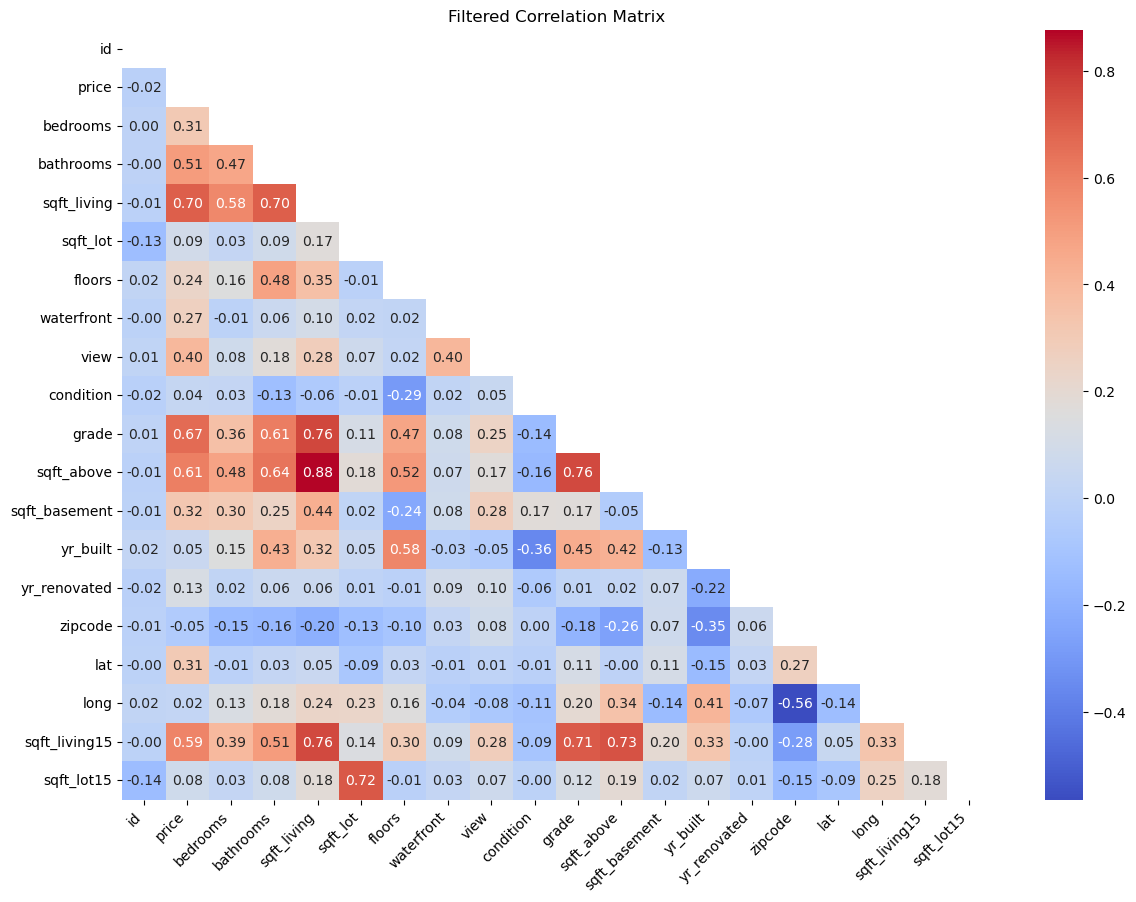

In [18]:

def filter_correlations(corr_matrix, threshold=0.5):
    mask = np.abs(corr_matrix) >= threshold
    filtered_corr = corr_matrix[mask].fillna(0)
    return filtered_corr

def plot_heatmap(matrix, title, size=(14, 10)):
    mask = np.triu(np.ones_like(matrix, dtype=bool))  # Create a mask for the upper triangle
    plt.figure(figsize=size)
    sns.heatmap(matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title(title)
    plt.show()

# Select only the numeric columns from the DataFrame
numeric_cols = data.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Filter the correlation matrix to only show high correlations
filtered_corr_matrix = filter_correlations(corr_matrix, threshold=0)

# Plot heatmap with the upper triangle masked
plot_heatmap(filtered_corr_matrix, 'Filtered Correlation Matrix')


# scatter subplots to visualize the relationship between our target variable "price" and other features

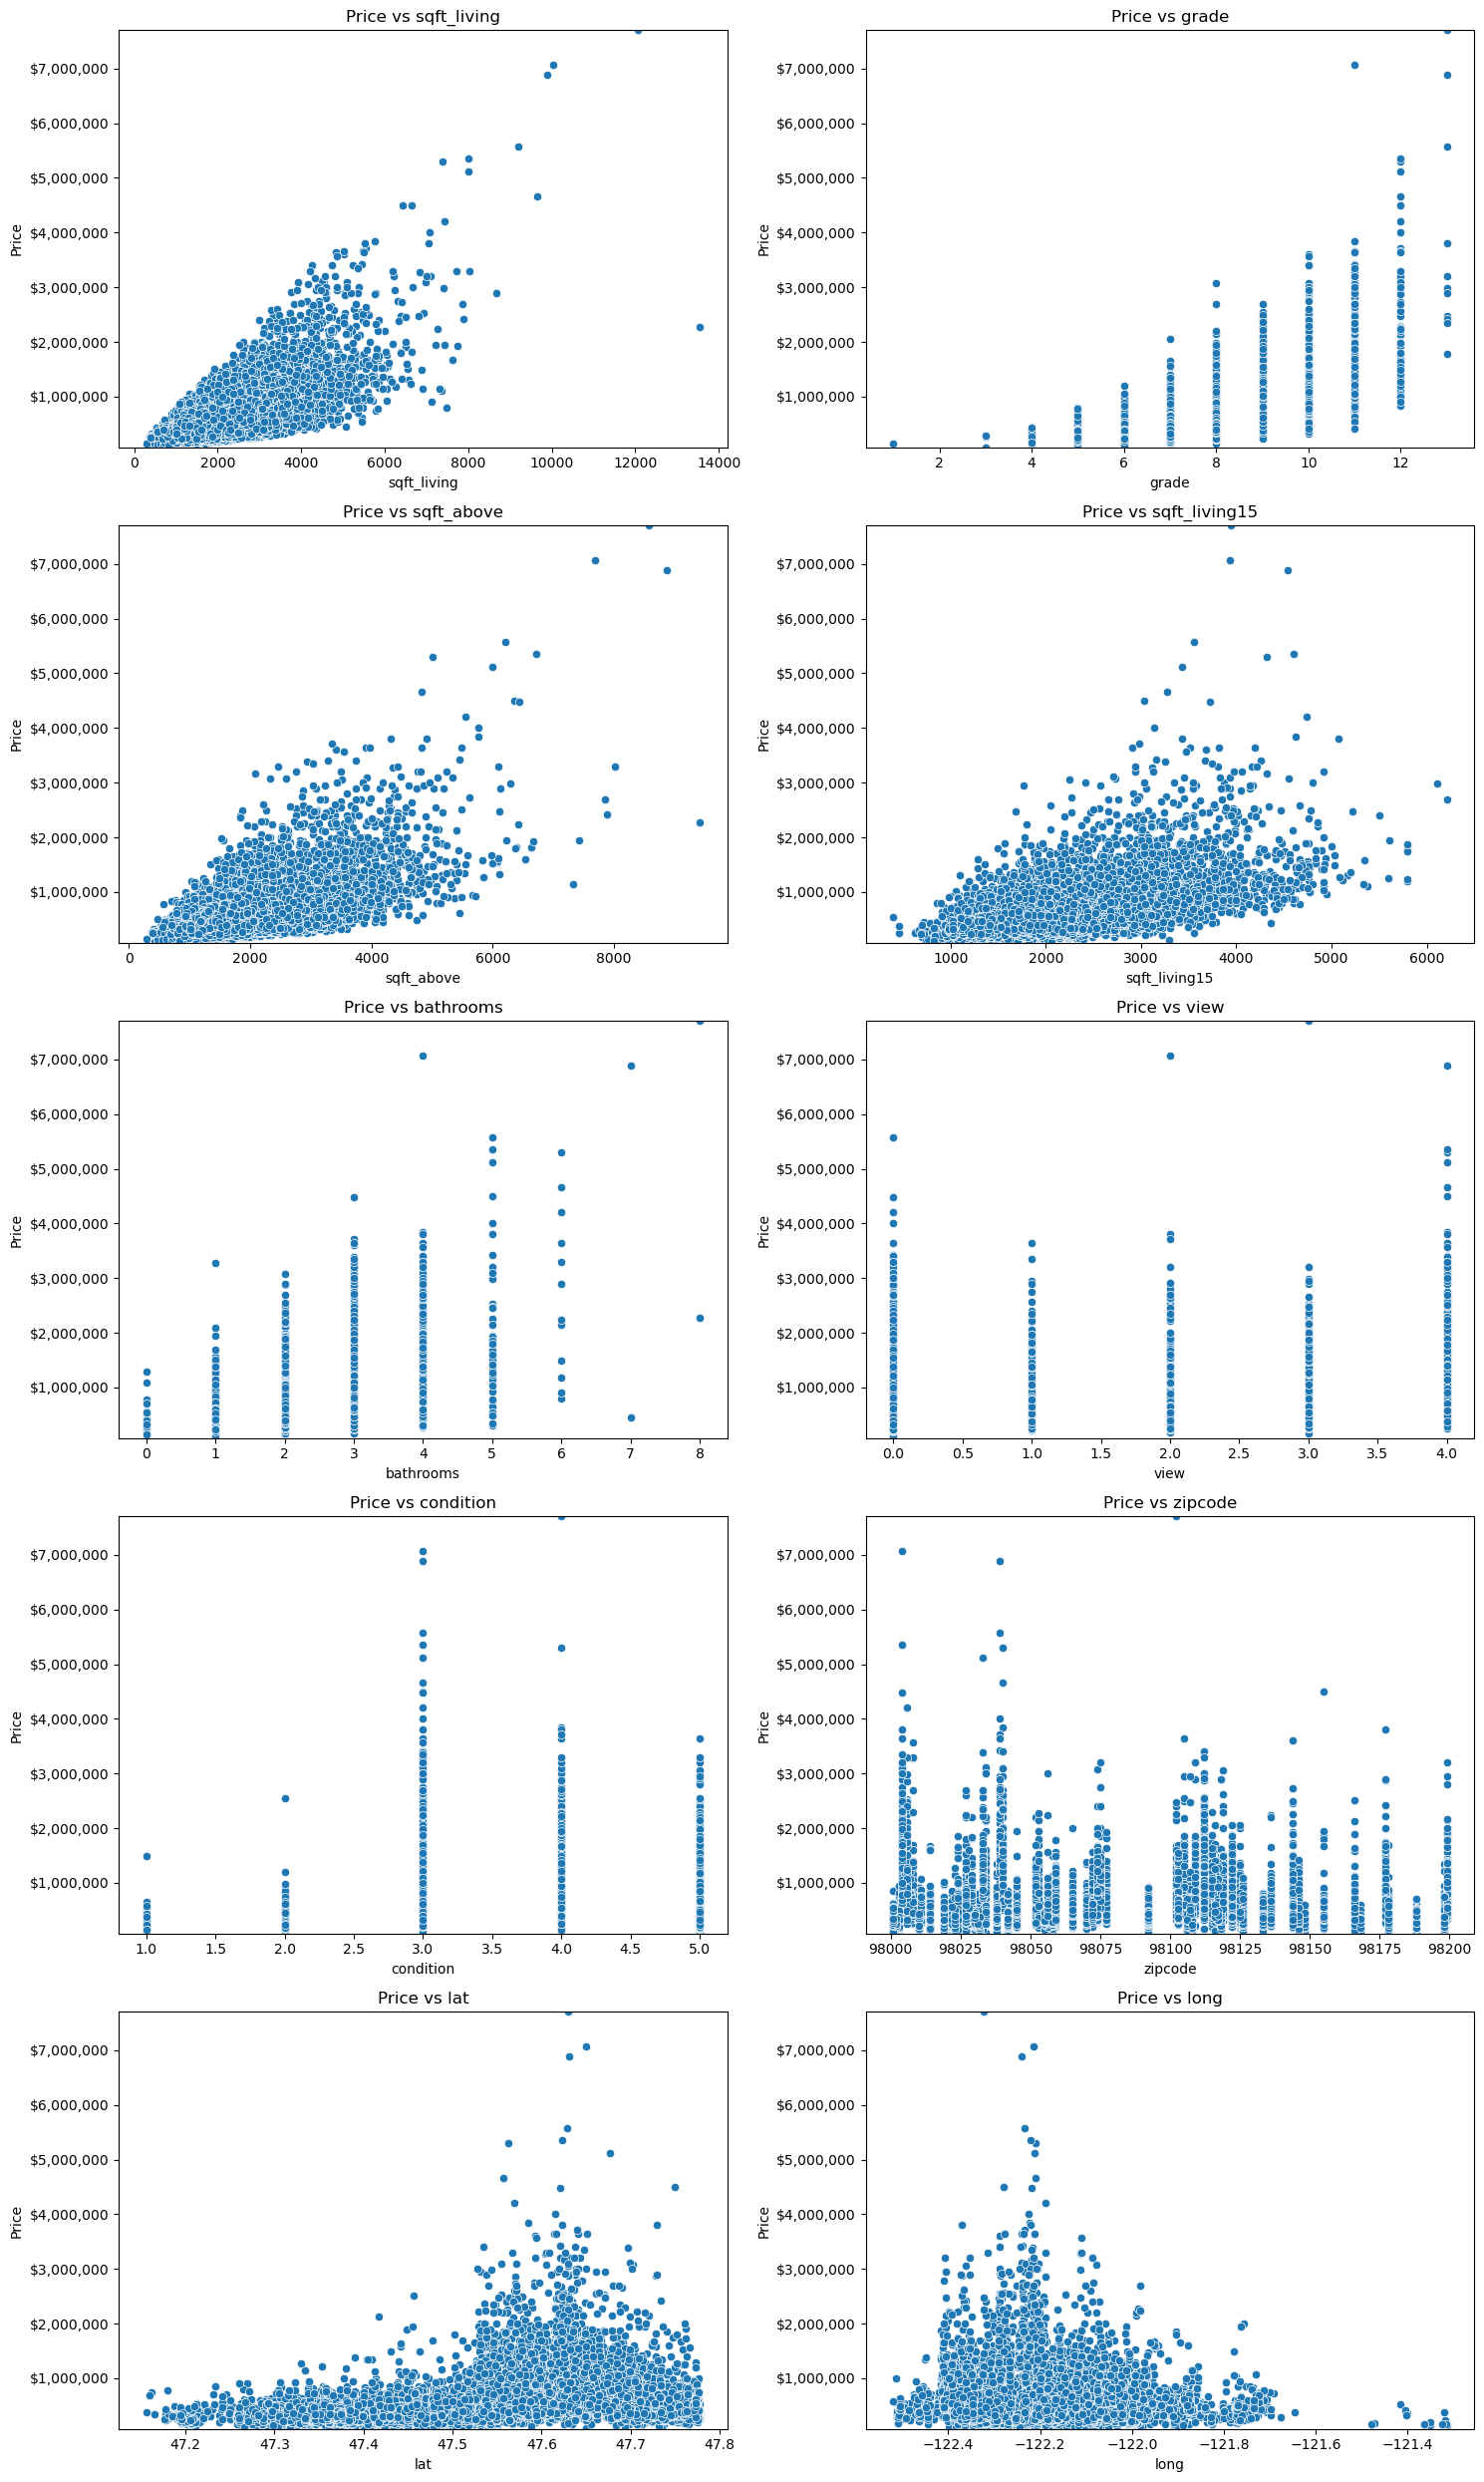

In [19]:
# Use %matplotlib inline for inline plotting in Jupyter notebooks
%matplotlib inline


# Select relevant features for plotting
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view', 'condition', 'zipcode', 'lat', 'long']
target = 'price'

# Number of rows and columns for subplots
num_features = len(features)
ncols = 2
nrows = (num_features + 1) // ncols

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
axs = axs.flatten()

# Plot scatter plots for each feature
for i, feature in enumerate(features):
    sns.scatterplot(x=data[feature], y=data[target], ax=axs[i])
    axs[i].set_title(f'Price vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Price')
    axs[i].set_ylim(data[target].min(), data[target].max())  # Set y-axis scale to exact range of the target variable
    # Set y-axis to use the actual price values
    axs[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Remove any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('C://Users/chege/Desktop/ProjectX/House Prediction/house_prices_relationships_actual_scale.png') 

# Display the plot
plt.show()

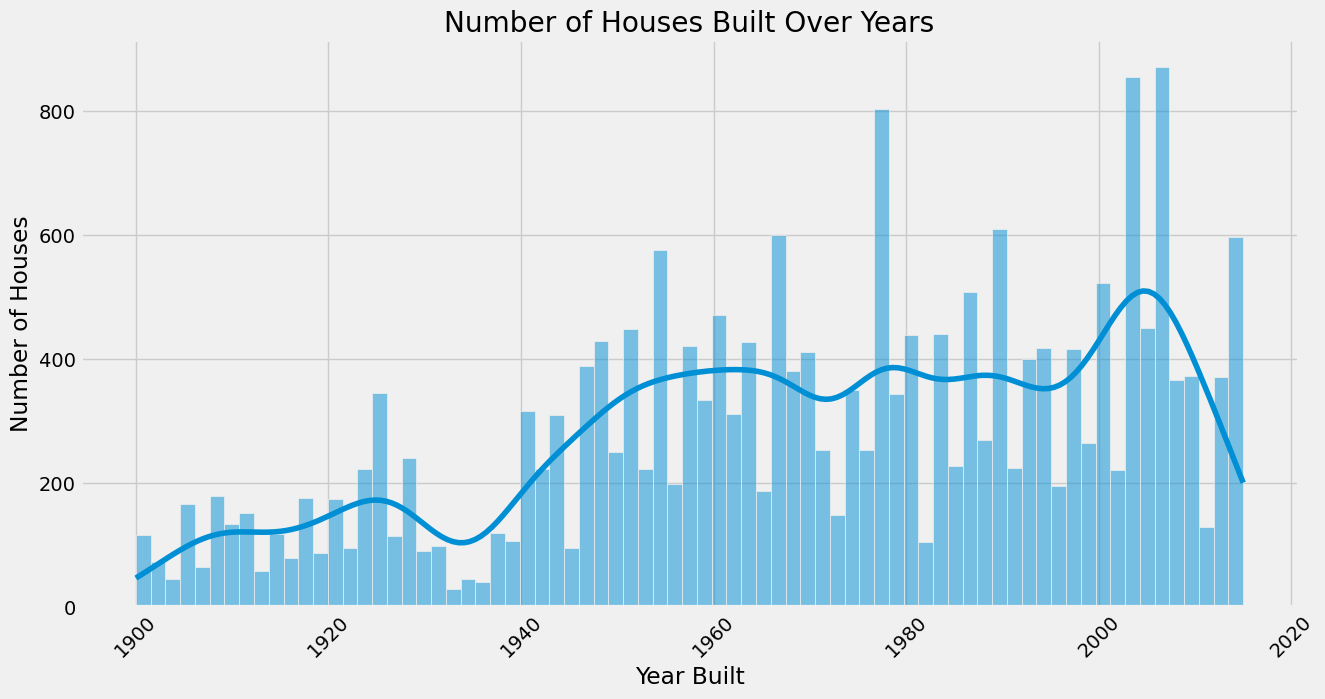

In [30]:
# Create a histogram or bar plot to show the number of houses built against the year built
plt.style.use("fivethirtyeight")
plt.figure(figsize=(14, 7))
sns.histplot(data['yr_built'], bins=75, kde=True)
plt.title('Number of Houses Built Over Years')
plt.xlabel('Year Built')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.show()

# House price distribution by geographic position

In [21]:
import plotly.express as px

fig = px.scatter_mapbox(data, lat="lat", lon="long", color="price",
                        color_continuous_scale=px.colors.cyclical.HSV_r, size_max=15, zoom=10,
                        mapbox_style="carto-positron")

fig.update_layout(title='House Prices by Location')
fig.show()

# House price distribution by geographic position clusters and Feature Engineering

In [22]:
from sklearn.cluster import KMeans
# Select relevant features for clustering
features = data[['lat', 'long', 'price']]
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42).fit(features)
data['cluster'] = kmeans.labels_

# Create an interactive scatter plot with clusters
fig = px.scatter_mapbox(data, lat="lat", lon="long", color="cluster",
                        color_continuous_scale=px.colors.cyclical.HSV_r, size_max=15, zoom=10,
                        mapbox_style="carto-positron", title='House Prices by Location with Clusters')

# Show the plot
fig.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [23]:
# Create a new column with zeros and ones based on yr_renovated values
data['yr_renovated_encoded'] = data['yr_renovated'].apply(lambda x: 1 if x != 0 else 0)

In [24]:
# drop columns that we are not going to use for our model training and evaluation
data = data.drop(columns=['yr_renovated','id','zipcode'])

In [25]:
data.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3          1         1180      5650       1           0   
1  538000.0         3          2         2570      7242       2           0   
2  180000.0         2          1          770     10000       1           0   
3  604000.0         4          3         1960      5000       1           0   
4  510000.0         3          2         1680      8080       1           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built      lat  \
0     0          3      7        1180              0      1955  47.5112   
1     0          3      7        2170            400      1951  47.7210   
2     0          3      6         770              0      1933  47.7379   
3     0          5      7        1050            910      1965  47.5208   
4     0          3      8        1680              0      1987  47.6168   

      long  sqft_living15  sqft_lot15  cluster  yr_renovated_encoded  
0 -122.257           1340        5650        1                     0  
1 -122.319           1690        7639        4                     1  
2 -122.233           2720        8062        1                     0  
3 -122.393           1360        5000        4                     0  
4 -122.045           1800        7503        4                     0

In [26]:
features.head() # our training data

lat     long     price
0  47.5112 -122.257  221900.0
1  47.7210 -122.319  538000.0
2  47.7379 -122.233  180000.0
3  47.5208 -122.393  604000.0
4  47.6168 -122.045  510000.0

# Model training and evaluation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # Import joblib for saving and loading the model

# Select features and target variable
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'lat', 'long', 'sqft_living15', 'sqft_lot15', 'cluster', 'yr_renovated_encoded']
X = data[features]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Later, to load the model and make predictions:
# loaded_model = joblib.load(model_filename)
# y_pred_loaded = loaded_model.predict(X_test)


Mean Absolute Error: 52248.86882201237
Mean Squared Error: 12805535484.28495
R^2 Score: 0.9152942586651327


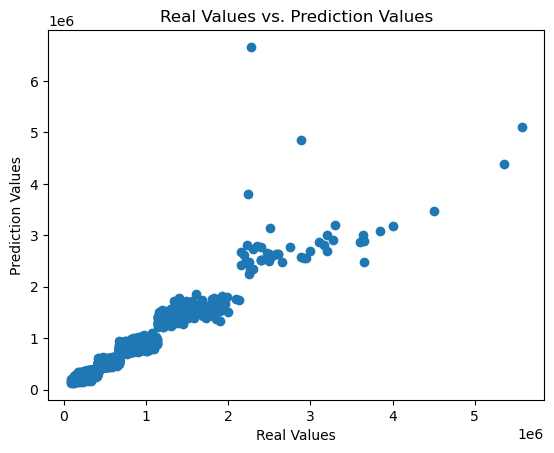

In [28]:
#We will see the differences between real numbers and prediction numbers.
plt.scatter(y_test, y_pred)
plt.xlabel("Real Values")
plt.ylabel("Prediction Values")
plt.title("Real Values vs. Prediction Values")
plt.show()